<a href="https://colab.research.google.com/github/AliaaElshamekh/Multi-class-classifier-that-successfully-classifies-the-images-of-the-Fashion-MNIST-dataset./blob/main/MLP_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import scale 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
import warnings
import math 
from sklearn.metrics import mean_squared_error 
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report
from sklearn import tree
import seaborn as sns
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import validation_curve
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn import svm
import scipy.stats as stats
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neural_network import MLPClassifier

In [ ]:
X_traindf = pd.read_csv('X_train.csv')
X_testdf = pd.read_csv('X_test.csv')
y_traindf = pd.read_csv('y_train.csv')
y_testdf = pd.read_csv('y_test.csv')
X_traindf.head()

,0,0.1,0.2,0.3,0.4,1,0.5,0.6,0.7,0.8,41,188,103,54,48,43,87,168,133,16,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,1.1,0.20,0.21,0.22,49,136,219,216,228,...,244.2,240,243.1,214.8,224.4,162,0.279,2.6,0.280,0.281,0.282,0.283,0.284,0.285,0.286,0.287,0.288,1.13,0.289,0.290,139.1,146,130,135,135.1,137,125,124.1,125.1,121.1,119,114,130.1,76.1,0.291,0.292,0.293,0.294,0.295,0.296
0,0,0,0,0,0,0,0,0,0,22,118,24,0,0,0,0,0,48,88,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,100,212,205,...,106,102,75,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,18,42,57,56,32,8,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,189,206,187,32,...,255,242,255,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,61,102,168,25,0,139,161,74,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,11,142,200,106,0,0,0,0,0,0,0,85,185,112,0,0,0,0,0,0,0,0,0,0,0,0,0,152,214,217,194,236,216,...,206,255,197,178,179,42,0,5,0,0,0,0,0,0,0,0,0,3,0,115,135,113,106,85,82,108,133,83,90,121,120,110,158,18,0,3,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,19,4,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,72,157,222,...,239,228,231,198,217,17,0,2,0,0,0,0,0,0,0,0,0,1,0,0,37,69,89,97,109,122,127,126,130,116,91,80,46,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,58,121,218,110,58,42,54,85,176,228,121,33,0,0,0,0,0,0,0,0,0,0,0,0,0,18,66,129,148,121,149,254,...,235,233,233,228,190,202,0,0,3,0,0,0,0,0,0,1,0,0,44,19,29,27,26,29,29,28,27,27,27,25,21,23,30,37,0,0,1,0,0,0


In [ ]:
#Let's create numpy arrays for X and y
X_train = X_traindf.values
X_test = X_testdf.values
y_train = y_traindf.values
y_test = y_testdf.values

In [ ]:
np.random.seed(42)   # if you want reproducible results set the random seed value.
shuffle_index = np.random.permutation(9999)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [ ]:
def showImage(data):
    some_article = data
    some_article_image = some_article.reshape(28, 28) # Reshaping it to get the 28x28 pixels
    plt.imshow(some_article_image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")
    plt.show()

In [ ]:
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255

In [ ]:
mlp=MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
print("Accuracy on training set:  {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set:  {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set:  0.93
Accuracy on test set:  0.84


In [ ]:
#no scaling and using 4-fold cross validation
#MLP
scores = [] #store the accuracy scores
cv = KFold(n_splits=4, random_state=42, shuffle=False) #set the CV parameters
i = 1
for train_index, test_index in cv.split(X_train):
    X_train_fold, X_test_fold, y_train_fold, y_test_fold = X_train[train_index], X_train[test_index], y_train[train_index], y_train[test_index]
    mlp.fit(X_train_fold, y_train_fold)
    scores.append(mlp.score(X_test_fold, y_test_fold))
    print('Processing Fold #', i)
    print("  - Train partition shape: ", X_train_fold.shape)
    print("  - Test partition shape: ", X_test_fold.shape)
    print("  - Training score = ", mlp.score(X_train_fold, y_train_fold))
    print("  - Testing score = ", mlp.score(X_test_fold, y_test_fold))
    
    i += 1

Processing Fold # 1
  - Train partition shape:  (7499, 784)
  - Test partition shape:  (2500, 784)
  - Training score =  0.9753300440058674
  - Testing score =  0.872
Processing Fold # 2
  - Train partition shape:  (7499, 784)
  - Test partition shape:  (2500, 784)
  - Training score =  0.9346579543939192
  - Testing score =  0.8572
Processing Fold # 3
  - Train partition shape:  (7499, 784)
  - Test partition shape:  (2500, 784)
  - Training score =  0.9673289771969596
  - Testing score =  0.8748
Processing Fold # 4
  - Train partition shape:  (7500, 784)
  - Test partition shape:  (2499, 784)
  - Training score =  0.9734666666666667
  - Testing score =  0.8615446178471389


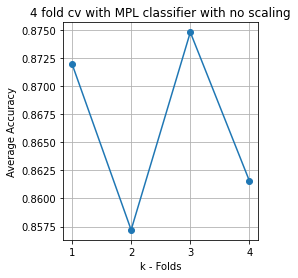

In [ ]:
# plot the change in the average accuracy according to k 
plt.figure(figsize=(3.5,4))
plt.title("4 fold cv with MPL classifier with no scaling")
plt.xlabel("k - Folds")
plt.ylabel("Average Accuracy")
plt.xticks =np.arange(1, 5, 1)
plt.grid()
plt.plot(np.arange(1, 5, 1),scores,'o-');

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()), ('mlp',MLPClassifier(random_state=42))])
scores_std = cross_val_score(pipe, X_train, y_train, cv=4)
scores_std

array([0.8924   , 0.904    , 0.9008   , 0.8907563])

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()), ('mlp',MLPClassifier(random_state=42))])
scores_std = [] #store the accuracy scores
cv = KFold(n_splits=4, random_state=42, shuffle=False) #set the CV parameters
i = 1
for train_index, test_index in cv.split(X_train):
    X_train_fold, X_test_fold, y_train_fold, y_test_fold = X_train[train_index], X_train[test_index], y_train[train_index], y_train[test_index]
    pipe.fit(X_train_fold, y_train_fold)
    scores_std.append(pipe.score(X_test_fold, y_test_fold))
    print('Processing Fold #', i)
    print("  - Train partition shape: ", X_train_fold.shape)
    print("  - Test partition shape: ", X_test_fold.shape)
    print("  - Training score = ", pipe.score(X_train_fold, y_train_fold))
    print("  - Testing score = ", pipe.score(X_test_fold, y_test_fold))    
    i += 1

Processing Fold # 1
  - Train partition shape:  (7499, 784)
  - Test partition shape:  (2500, 784)
  - Training score =  1.0
  - Testing score =  0.894
Processing Fold # 2
  - Train partition shape:  (7499, 784)
  - Test partition shape:  (2500, 784)
  - Training score =  1.0
  - Testing score =  0.9012
Processing Fold # 3
  - Train partition shape:  (7499, 784)
  - Test partition shape:  (2500, 784)
  - Training score =  1.0
  - Testing score =  0.9032
Processing Fold # 4
  - Train partition shape:  (7500, 784)
  - Test partition shape:  (2499, 784)
  - Training score =  1.0
  - Testing score =  0.8883553421368547


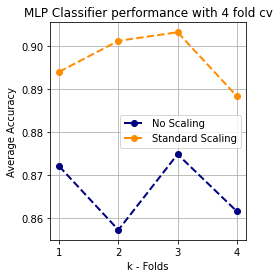

In [ ]:
# plot the change in the average accuracy according to k 
plt.figure(figsize=(3.5,4))
plt.title("MLP Classifier performance with 4 fold cv")
plt.xlabel("k - Folds")
plt.ylabel("Average Accuracy")
plt.xticks =np.arange(1, 5, 1)
plt.grid()
lw = 2
plt.plot(np.arange(1, 5, 1),scores,'o-',label="No Scaling",
             color="navy", lw=lw,ls='--',marker ='o');
plt.plot(np.arange(1, 5, 1),scores_std,'o-',label="Standard Scaling",
             color="darkorange", lw=lw ,ls='--',marker ='o');

plt.legend(loc="best")
plt.show()

In [ ]:
pipe_min = Pipeline([('scaler', MinMaxScaler()), ('mlp',MLPClassifier(random_state=42))])
scores_min = [] #store the accuracy scores
cv = KFold(n_splits=4, random_state=42, shuffle=False) #set the CV parameters
i = 1
for train_index, test_index in cv.split(X_train):
    X_train_fold, X_test_fold, y_train_fold, y_test_fold = X_train[train_index], X_train[test_index], y_train[train_index], y_train[test_index]
    pipe_min.fit(X_train_fold, y_train_fold)
    scores_min.append(pipe_min.score(X_test_fold, y_test_fold))
    print('Processing Fold #', i)
    print("  - Train partition shape: ", X_train_fold.shape)
    print("  - Test partition shape: ", X_test_fold.shape)
    print("  - Training score = ", pipe_min.score(X_train_fold, y_train_fold))
    print("  - Testing score = ", pipe_min.score(X_test_fold, y_test_fold))    
    i += 1

Processing Fold # 1
  - Train partition shape:  (7499, 784)
  - Test partition shape:  (2500, 784)
  - Training score =  0.9859981330844113
  - Testing score =  0.8784
Processing Fold # 2
  - Train partition shape:  (7499, 784)
  - Test partition shape:  (2500, 784)
  - Training score =  0.9994665955460728
  - Testing score =  0.8988
Processing Fold # 3
  - Train partition shape:  (7499, 784)
  - Test partition shape:  (2500, 784)
  - Training score =  0.9995999466595547
  - Testing score =  0.8968
Processing Fold # 4
  - Train partition shape:  (7500, 784)
  - Test partition shape:  (2499, 784)
  - Training score =  0.9997333333333334
  - Testing score =  0.8847539015606243


In [ ]:
pipe_min.predict_proba(X_test)

array([[0.21669548, 0.08578557, 0.13383845, 0.54034795, 0.02333255],
       [0.24447041, 0.08542264, 0.15670023, 0.48979797, 0.02360876],
       [0.25004997, 0.08460155, 0.15829771, 0.48442727, 0.0226235 ],
       ...,
       [0.22230862, 0.0937981 , 0.17918493, 0.47711162, 0.02759673],
       [0.21774175, 0.0927099 , 0.16959138, 0.49217198, 0.02778499],
       [0.21192048, 0.09575974, 0.17944254, 0.48425386, 0.02862337]])

In [ ]:
pipe_rbst = Pipeline([('scaler', RobustScaler()), ('mlp',MLPClassifier(random_state=42))])
scores_rbst = [] #store the accuracy scores
cv = KFold(n_splits=4, random_state=42, shuffle=False) #set the CV parameters
i = 1
for train_index, test_index in cv.split(X_train):
    X_train_fold, X_test_fold, y_train_fold, y_test_fold = X_train[train_index], X_train[test_index], y_train[train_index], y_train[test_index]
    pipe_rbst.fit(X_train_fold, y_train_fold)
    scores_rbst.append(pipe_rbst.score(X_test_fold, y_test_fold))
    print('Processing Fold #', i)
    print("  - Train partition shape: ", X_train_fold.shape)
    print("  - Test partition shape: ", X_test_fold.shape)
    print("  - Training score = ", pipe_rbst.score(X_train_fold, y_train_fold))
    print("  - Testing score = ", pipe_rbst.score(X_test_fold, y_test_fold))    
    i += 1

Processing Fold # 1
  - Train partition shape:  (7499, 784)
  - Test partition shape:  (2500, 784)
  - Training score =  0.9925323376450194
  - Testing score =  0.8684
Processing Fold # 2
  - Train partition shape:  (7499, 784)
  - Test partition shape:  (2500, 784)
  - Training score =  0.9779970662755034
  - Testing score =  0.8708
Processing Fold # 3
  - Train partition shape:  (7499, 784)
  - Test partition shape:  (2500, 784)
  - Training score =  0.9917322309641285
  - Testing score =  0.8856
Processing Fold # 4
  - Train partition shape:  (7500, 784)
  - Test partition shape:  (2499, 784)
  - Training score =  0.9884
  - Testing score =  0.8759503801520608


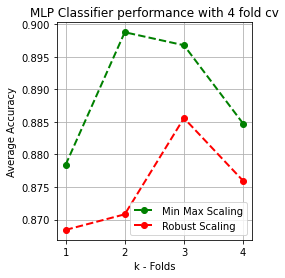

In [ ]:
# plot the change in the average accuracy according to k 
plt.figure(figsize=(3.5,4))
plt.title("MLP Classifier performance with 4 fold cv")
plt.xlabel("k - Folds")
plt.ylabel("Average Accuracy")
plt.xticks =np.arange(1, 5, 1)
plt.grid()
lw = 2
plt.plot(np.arange(1, 5, 1),scores_min,'o-',label="Min Max Scaling",
             color="green", lw=lw,ls='--',marker ='o');
plt.plot(np.arange(1, 5, 1),scores_rbst,'o-',label="Robust Scaling",
             color="red", lw=lw ,ls='--',marker ='o');

plt.legend(loc="best")
plt.show()

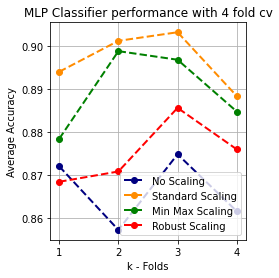

In [ ]:
# plot the change in the average accuracy according to k 
plt.figure(figsize=(3.5,4))
plt.title("MLP Classifier performance with 4 fold cv")
plt.xlabel("k - Folds")
plt.ylabel("Average Accuracy")
plt.xticks =np.arange(1, 5, 1)
plt.grid()
lw = 2
plt.plot(np.arange(1, 5, 1),scores,'o-',label="No Scaling",
             color="navy", lw=lw,ls='--',marker ='o');
plt.plot(np.arange(1, 5, 1),scores_std,'o-',label="Standard Scaling",
             color="darkorange", lw=lw ,ls='--',marker ='o');
             
plt.plot(np.arange(1, 5, 1),scores_min,'o-',label="Min Max Scaling",
             color="green", lw=lw,ls='--',marker ='o');
plt.plot(np.arange(1, 5, 1),scores_rbst,'o-',label="Robust Scaling",
             color="red", lw=lw ,ls='--',marker ='o');

plt.legend(loc="best")
plt.show()

In [ ]:
parameter_space = {
    'hidden_layer_sizes': [(100,), (100,100,),(10,),(10,10)],
     'alpha':[0.00001, 0.0001, 0.1]
}


In [ ]:
clf_mlp=MLPClassifier(random_state=42)
mlp_search = GridSearchCV(estimator=clf_mlp,param_grid= parameter_space, cv=4,refit=True,verbose=2,scoring='accuracy')


In [ ]:
mlp_search.fit(X_train,y_train)

Fitting 4 folds for each of 12 candidates, totalling 48 fits
[CV] alpha=1e-05, hidden_layer_sizes=(100,) ..........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........... alpha=1e-05, hidden_layer_sizes=(100,), total=  48.2s
[CV] alpha=1e-05, hidden_layer_sizes=(100,) ..........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   48.2s remaining:    0.0s


[CV] ........... alpha=1e-05, hidden_layer_sizes=(100,), total=  48.0s
[CV] alpha=1e-05, hidden_layer_sizes=(100,) ..........................
[CV] ........... alpha=1e-05, hidden_layer_sizes=(100,), total=  47.2s
[CV] alpha=1e-05, hidden_layer_sizes=(100,) ..........................
[CV] ........... alpha=1e-05, hidden_layer_sizes=(100,), total=  47.1s
[CV] alpha=1e-05, hidden_layer_sizes=(100, 100) ......................
[CV] ....... alpha=1e-05, hidden_layer_sizes=(100, 100), total=  36.5s
[CV] alpha=1e-05, hidden_layer_sizes=(100, 100) ......................
[CV] ....... alpha=1e-05, hidden_layer_sizes=(100, 100), total=  33.0s
[CV] alpha=1e-05, hidden_layer_sizes=(100, 100) ......................
[CV] ....... alpha=1e-05, hidden_layer_sizes=(100, 100), total=  28.2s
[CV] alpha=1e-05, hidden_layer_sizes=(100, 100) ......................
[CV] ....... alpha=1e-05, hidden_layer_sizes=(100, 100), total=  36.5s
[CV] alpha=1e-05, hidden_layer_sizes=(10,) ...........................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed: 22.9min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=42, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'

In [ ]:
print(mlp_search.best_estimator_)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


In [ ]:
results_df = pd.DataFrame(mlp_search.cv_results_)
results_df = results_df.sort_values(by=['rank_test_score'])
results_df = (
    results_df
    .set_index(results_df["params"].apply(
        lambda x: "_".join(str(val) for val in x.values()))
    )
    .rename_axis('kernel')
)
results_df[
    ['params', 'rank_test_score', 'mean_test_score', 'std_test_score']
]

,params,rank_test_score,mean_test_score,std_test_score
kernel,,,,
"0.0001_(100, 100)","{'alpha': 0.0001, 'hidden_layer_sizes': (100, ...",1,0.894989,0.004661
"0.1_(100,)","{'alpha': 0.1, 'hidden_layer_sizes': (100,)}",2,0.894789,0.002631
"0.0001_(100,)","{'alpha': 0.0001, 'hidden_layer_sizes': (100,)}",3,0.893489,0.004634
"1e-05_(100, 100)","{'alpha': 1e-05, 'hidden_layer_sizes': (100, 1...",4,0.892788,0.008300
"0.1_(100, 100)","{'alpha': 0.1, 'hidden_layer_sizes': (100, 100)}",5,0.892488,0.007451
"1e-05_(100,)","{'alpha': 1e-05, 'hidden_layer_sizes': (100,)}",6,0.891989,0.004445
"0.1_(10,)","{'alpha': 0.1, 'hidden_layer_sizes': (10,)}",7,0.880388,0.004144
"1e-05_(10,)","{'alpha': 1e-05, 'hidden_layer_sizes': (10,)}",8,0.877387,0.004569
"0.1_(10, 10)","{'alpha': 0.1, 'hidden_layer_sizes': (10, 10)}",9,0.876688,0.007062


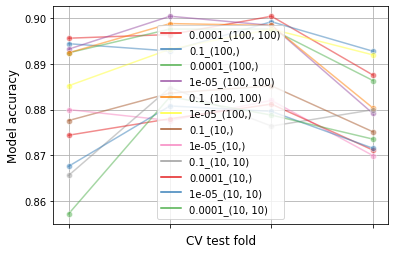

Correlation of models:
 kernel             0.0001_(100, 100)  ...  0.0001_(10, 10)
kernel                                ...                 
0.0001_(100, 100)           1.000000  ...         0.173284
0.1_(100,)                  0.732370  ...         0.108471
0.0001_(100,)               0.930803  ...         0.428766
1e-05_(100, 100)            0.922328  ...         0.288004
0.1_(100, 100)              0.943382  ...         0.312973
1e-05_(100,)                0.339779  ...         0.875560
0.1_(10,)                   0.877638  ...         0.622799
1e-05_(10,)                 0.964513  ...        -0.092851
0.1_(10, 10)               -0.160641  ...         0.925987
0.0001_(10,)                0.938436  ...         0.491595
1e-05_(10, 10)              0.527725  ...         0.924990
0.0001_(10, 10)             0.173284  ...         1.000000

[12 rows x 12 columns]


In [ ]:
# create df of model scores ordered by perfomance
model_scores = results_df.filter(regex=r'split\d*_test_score')

# plot 30 examples of dependency between cv fold and AUC scores
fig, ax = plt.subplots()
sns.lineplot(
    data=model_scores.transpose().iloc[:30],
    dashes=False, palette='Set1', marker='o', alpha=.5, ax=ax
)
ax.set_xlabel("CV test fold", size=12, labelpad=10)
ax.set_ylabel("Model accuracy", size=12)
ax.tick_params(bottom=True, labelbottom=False)
plt.grid()
plt.legend(loc="best")
plt.show()

# print correlation of AUC scores across folds
print(f"Correlation of models:\n {model_scores.transpose().corr()}")

In [ ]:
print("Best parameters set found on development set:")
print()
print(mlp_search.best_params_)
print()
print("Grid scores on development set:")
print()
means = mlp_search.cv_results_['mean_test_score']
stds = mlp_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, mlp_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, mlp_search.predict(X_test)
print(classification_report(y_true, y_pred))
print()

Best parameters set found on development set:

{'alpha': 0.0001, 'hidden_layer_sizes': (100, 100)}

Grid scores on development set:

0.892 (+/-0.009) for {'alpha': 1e-05, 'hidden_layer_sizes': (100,)}
0.893 (+/-0.017) for {'alpha': 1e-05, 'hidden_layer_sizes': (100, 100)}
0.877 (+/-0.009) for {'alpha': 1e-05, 'hidden_layer_sizes': (10,)}
0.875 (+/-0.011) for {'alpha': 1e-05, 'hidden_layer_sizes': (10, 10)}
0.893 (+/-0.009) for {'alpha': 0.0001, 'hidden_layer_sizes': (100,)}
0.895 (+/-0.009) for {'alpha': 0.0001, 'hidden_layer_sizes': (100, 100)}
0.876 (+/-0.008) for {'alpha': 0.0001, 'hidden_layer_sizes': (10,)}
0.873 (+/-0.019) for {'alpha': 0.0001, 'hidden_layer_sizes': (10, 10)}
0.895 (+/-0.005) for {'alpha': 0.1, 'hidden_layer_sizes': (100,)}
0.892 (+/-0.015) for {'alpha': 0.1, 'hidden_layer_sizes': (100, 100)}
0.880 (+/-0.008) for {'alpha': 0.1, 'hidden_layer_sizes': (10,)}
0.877 (+/-0.014) for {'alpha': 0.1, 'hidden_layer_sizes': (10, 10)}

Detailed classification report:

The mo

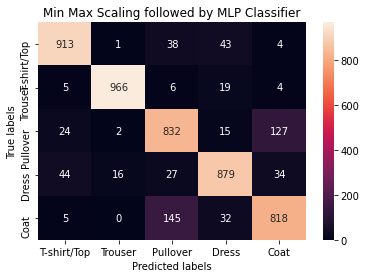

In [ ]:
mlp_cm = metrics.confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(mlp_cm, annot=True, ax = ax,fmt='d'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title( 'Min Max Scaling followed by MLP Classifier' ); 
#ax.xaxis.set_ticklabels(['T-shirt/Top','Trouser','Pullover','Dress','Coat'])); ax.yaxis.set_ticklabels(['T-shirt/Top','Trouser','Pullover','Dress','Coat']);

ax.xaxis.set_ticklabels(['T-shirt/Top','Trouser','Pullover','Dress','Coat']); ax.yaxis.set_ticklabels(['T-shirt/Top','Trouser','Pullover','Dress','Coat']);

In [ ]:
predictions = mlp_search.predict(X_test)

In [ ]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, predictions):
    if label[0] != predict: 
       misclassifiedIndexes.append(index)
    index +=1

In [ ]:
misclassifiedIndexes

[11,
 33,
 36,
 46,
 59,
 81,
 104,
 107,
 113,
 120,
 124,
 152,
 191,
 253,
 263,
 273,
 287,
 289,
 290,
 294,
 312,
 318,
 346,
 349,
 356,
 372,
 393,
 399,
 400,
 401,
 409,
 424,
 461,
 473,
 478,
 490,
 495,
 501,
 511,
 537,
 540,
 543,
 544,
 576,
 579,
 597,
 598,
 602,
 610,
 618,
 620,
 626,
 634,
 655,
 687,
 695,
 711,
 726,
 735,
 764,
 774,
 789,
 806,
 807,
 818,
 837,
 852,
 861,
 868,
 875,
 884,
 886,
 892,
 902,
 920,
 925,
 934,
 948,
 952,
 970,
 977,
 979,
 985,
 990,
 992,
 994,
 1024,
 1068,
 1069,
 1079,
 1111,
 1146,
 1164,
 1172,
 1196,
 1249,
 1336,
 1507,
 1522,
 1532,
 1539,
 1547,
 1550,
 1613,
 1648,
 1735,
 1760,
 1766,
 1780,
 1786,
 1860,
 1903,
 1913,
 1930,
 1934,
 1943,
 1956,
 1959,
 1973,
 1987,
 2003,
 2029,
 2036,
 2047,
 2048,
 2049,
 2054,
 2059,
 2069,
 2080,
 2084,
 2089,
 2091,
 2099,
 2102,
 2107,
 2119,
 2126,
 2136,
 2141,
 2145,
 2154,
 2156,
 2158,
 2164,
 2165,
 2171,
 2177,
 2188,
 2201,
 2213,
 2225,
 2240,
 2242,
 2244,
 2249,


In [ ]:
index = 0
corr_classifiedIndexes= []
for label, predict in zip(y_test, predictions):
    if label[0] == predict: 
       corr_classifiedIndexes.append(index)
    index +=1

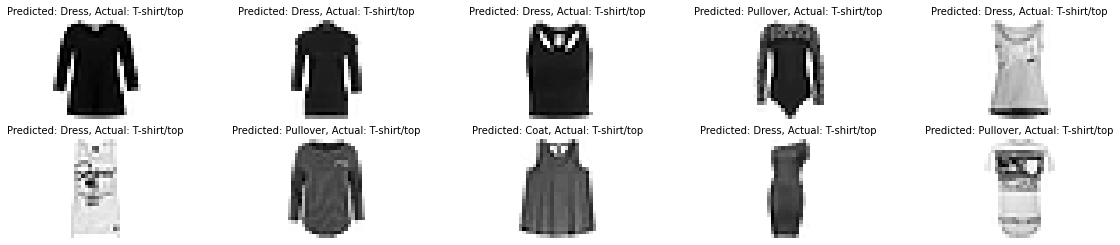

In [ ]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:10]):
    plt.subplot(2, 5, plotIndex + 1)
    plt.imshow(np.reshape(X_test[badIndex], (28,28)), cmap="gray_r")
    plt.axis('off')
    plt.title('Predicted: {}, Actual: {}'.format( labels[(int(predictions[badIndex]))], labels[y_test[badIndex][0]]), fontsize = 10)

In [ ]:
labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat"]

In [ ]:
corr_classifiedIndexes

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 34,
 35,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 105,
 106,
 108,
 109,
 110,
 111,
 112,
 114,
 115,
 116,
 117,
 118,
 119,
 121,
 122,
 123,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 192,
 193,
 194,
 195,
 196,


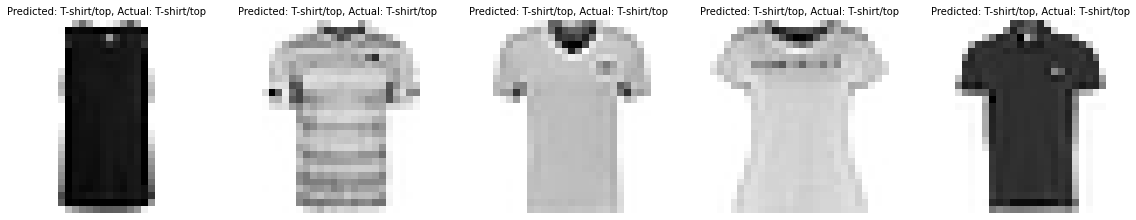

In [ ]:
plt.figure(figsize=(20,4))
for plotIndex, goodIndex in enumerate(corr_classifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(X_test[goodIndex], (28,28)), cmap="gray_r")
    plt.axis('off')
    plt.title('Predicted: {}, Actual: {}'.format( labels[(int(predictions[goodIndex]))], labels[y_test[goodIndex][0]]), fontsize = 10)

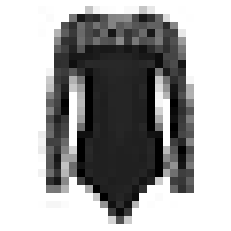

In [ ]:
showImage(X_test[46])


In [ ]:
y_test[46]

array([0])

In [ ]:
mlp_search.predict_proba(X_test[46].reshape(1, -1))

array([[2.79121595e-03, 1.51819210e-12, 9.97201129e-01, 7.55378402e-06,
        1.01011530e-07]])

In [ ]:
labels[predictions[46]]

'Pullover'

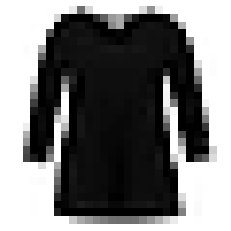

In [ ]:
showImage(X_test[11]) 


In [ ]:
y_test[11]

array([0])

In [ ]:
mlp_search.predict_proba(X_test[11].reshape(1, -1))

array([[6.19849743e-02, 1.35105632e-23, 3.80305818e-03, 9.34211968e-01,
        1.43388452e-15]])

In [ ]:
labels[predictions[11]]

'Dress'